# CSCI4022 Homework 6; More Graphs and some Recommendations

## Due Friday, April 9 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | 

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (15 pts; Coding: PageRank)



Consider the sparsely encoded link matrix in `EVA_Links`.  Each row is an (i, j) link tuple, where the row is included if company i is an owner of company j.  Each to/from integer ID corresponds to an index in the accompanying file `EVA_nodename`.  There is no node name or company indexed `0`, so you'll want to account for that.  There is no header, and the encoding is UTF-8.

#### a) 

Run the PageRank algorithm on this graph to determine the most powerful corporate "owners," so we'll interpret edges as pointing *to* the owning party.  Report the final PageRanks as an ordered ranking of the pages, printing the top 10 **companies**.  Include a teleportation probability of 15%.

#### b) 

The top 10 pages should include some companies you've heard of, but may also include many you *haven't*.  For those top 10 PageRanks, scan through the edges linking either *to* or *from* those pages and comment on any patterns that seem important.

Do these top few results pass a sanity check, in the context of what those companies do?  

Do they pass a sanity check that may suppor the claim that "PageRank returns the most important ownership structures?"  Why or why not?

-------------------------------------------------------------------------------
Source on data set:

 UF Sparse Matrix Collection, Tim Davis
 
 http://www.cise.ufl.edu/research/sparse/matrices/Pajek/EVA
 
 name: Pajek/EVA

 date: 2002
 
 author: K. Norlen, G. Lucas, M. Gebbie, J. Chuang
 
ed: V. Batagelj

-------------------------------------------------------------------------------



***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 2 (Practice: Graph Cuts; 20 pts) 
Suppose our graph is given below:

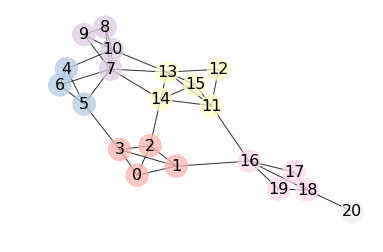

In [2]:
#manual edge assignments
edges=[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],\
      [4,5],[4,6],[5,6],\
      [7,8],[7,9],[7,10],[8,9],[8,10],[9,10],\
      [11,12],[11,13],[11,14],[11,15],[12,13],[13,14],[14,15],\
      [16,17],[16,18],[16,19],[17,19],[18,19],[17,18],\
      [1,16],[2,14],[3,5],[5,7],[6,7],[4,10],[10,13],[7,13],[7,14],[13,15],[11,16],[18,20]]
#create a dictionary as option
nodes = list(range(21))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])
    
#other useful variables
nodes = list(range(21))
N = len(nodes)

#networkx to plot the graph
G=nx.Graph()
nodes=[i for i in range(21)]
G.add_nodes_from(nodes)
for i in range(len(edges)):
    G.add_edge(edges[i][0],edges[i][1])

#plot the graph
np.random.seed(6) #graph plotting algorithm is random; this ensures same image each time
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations
colors=[0,0,0,0,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,5] #manual "family" groupings
labels=dict(zip(range(21),range(21))); #label 0-20
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap='Pastel1', node_size=500, alpha=.75); #node colors easy to see labels over
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.8); #draw edges
nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
plt.axis("off");


Loosely speaking, the data is generated from 5 clusters, although 2 clusters overlap somewhat.

### Part 1:
Find the Fiedler vector for the graph.  Plot the sorted Fiedler vector.  Use the `edges` array defined above.



### Part 2: Partitions

#### Part 2a:

Partition the graph into 2 graphs using this vector.  Include a picture of the associated *cut* of the graph.



#### Part 2b:

Partition the graph into 3 subgraphs using the Fiedler vector.  One natural way to do so is to partitition at the two largest 1-D **jumps** in the sorted vector instead of just one cut at $y=0$.  Include both associated *cuts* in another picture of the graph.



### Part 2c:

Partition the graph into 4 subgraphs using bipartitioning.



### Part 2d:

Of the 3 partitions above, which do you think were most appropriate.  Why?


***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (10 pts; Theory: Network MLEs)

Suppose graphs are generated by picking a probability $p$ and choosing each edge independently with probability $p$, as if our entire network were coming from a Community Affiliation Graph Model (AGM) with only *one*  universal community.

What value of $\hat{p}$ gives the maximum likelihood of seeing a specific graph with $n$ total nodes and $e$ total edges? What is the probability that your observed, specific graph is the one generated, if $p=\hat{p}$?